<a href="https://colab.research.google.com/github/AhmedMorra1/DataSciencePractice/blob/master/Why_FPX_dominated_G2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**G2 had everything to win Worlds 2019, what happened?**

Situation: To start, describe the current state to your audience. What is the status quo you’re trying to change?

Problem: Next, picture the problem. What’s the issue with the situation? Wherein lies the pain you’re trying to solve?

Solution: Present the solution. How do you solve the problem? How do you cure the pain?

Next Steps: You convinced the audience. What are the next steps you need to take? Which actions need to be taken?

**Situation**
Funplus Phoenix dominated G2 Esports in League of Legends Worlds Final, Winning with a clean sweep 3-0, for the second year in a row the LPL team clean sweep the EU team in the finals.

**Problem**  Though LPL is known to be a stronger region than LEC, G2 were the favorites before the start of the tournament, They won every championship they participated in through the whole year, LEC spring split, Mid Season Invitational and LEC summer split.
G2 Proved themselves in their region and internationaly, FPX on the other hand only won the LPL summer split, positioned 3rd in spring split.
G2 players had international experience while FPX players didn't have any.

**Solution** In this notebook we will try to gain insight on why Funplus Phoenix as a team and individualy performed better than G2 Esports and won the tournamnet.
Since the two teams compete in two different regions we will only compare between them using Worlds Championship data. 

We will start to explore individual performance of each player from both teams and how each rank against their opponent through the tournament, that will give us a hint about the individual power before diving into the team work.

First let's download the data from http://oracleselixir.com

In [0]:
!wget http://oracleselixir.com/gamedata/2019-worlds/

Now let's import the needed libraries for this analysis

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)

Let's put our data into data frame to ease our exploration process

In [0]:
df = pd.read_excel('index.html')

Since the two teams didn't participate in the play-in stage I will remove the matches from that stage from the dataframe.

First let's get the unique values for the column 'week' to see which weeks we are not interested in

In [4]:
df['week'].unique()

array(['PI-RR', 'PI-KO', 'G', 'QF', 'SF', 'F'], dtype=object)

Let's Delete these weeks ['PI-RR','PI-KO','F']

I deleted the final to only calculate the road to the finals for both teams

In [0]:
df = df[df['week'].isin(['G', 'QF', 'SF'])]

Let's seperate the teams from the players

In [0]:
teams = df.loc[df['player']=='Team']

In [0]:
playernames = ['Wunder','GimGoon','Jankos','Tian','Caps','Doinb','Perkz','Lwx','Mikyx','Crisp']
players = df.loc[(df['player']!='Team') & (df['player'].isin(playernames))]

Now let's start to explore players data.

What we will focus on is 

1.   KDA (all)
2.   first blood/first blood assist (all)
3.   Kill per minute (all except support)
4.   Damage to champs / Damage to champs per minute / Damage Share (all)
5.   Earned gold per minute / gold share /gold at 10/15 (all)
6.   Wards / wards per minute   (support)
7.   Cs per minute/cs at 15  (top/mid/bot)
8.   Experience at 10 (all)
9.   Monster kills (jungler)




Let's start with TOP Lane and explore the mentioned stats.

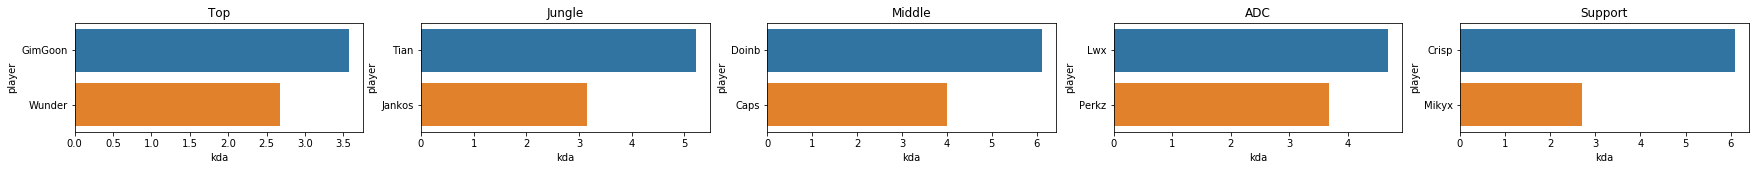

In [83]:
rules = ['Top','Jungle','Middle','ADC','Support']
y = 0
fig,ax = plt.subplots(1,5,figsize=(30,2),squeeze=False)
for i in rules:
    kda = players.loc[players['position']==i].groupby(['player'])['k','d','a'].sum()
    kda['kda'] = (kda['k']+kda['a'])/kda['d']
    kda = kda.sort_values(['kda'],ascending=False)
    sns.barplot(x=kda['kda'],y=kda.index,data=kda,ax=ax[0][y])
    ax[0][y].set_title(i)
    y += 1
plt.show()      

As we can see FPX Player dominates the KDA stats over G2 Esports players